<a href="https://colab.research.google.com/github/van-dang/FEniCS-Colab/blob/master/Time_stepping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solve an ODE

After this lecture, students are able to

*  Distinguish between linear and non-linear ODE. 
*  Familiarize with the most commonly used numerical schemes to solve an ODE.
*  Understand why one needs different schemes.
*  Bring the method to practice.



# Linear ODE

We consider a first-order ODE 
$$\frac{du}{dt}=f(u,t), \quad t\in (0, T]\\\text{with initial condition } u(0)=u_0 $$

Can we find the analytical solution easily?

For example

$$\frac{du}{dt}=-10\, u$$ 
with $u(0)=1$ can be easily solve to obtain $u(t)=\exp(-10\,t)$.

How about $\dfrac{du}{dt}=-10\, u +\,t$ with u(t)=1? Not easy to solve with a very small change!

One needs to rely on numerical solution.

**Procedure**

*   Discretize the domain $(0, T]$ by $N$ grid points $0=t_0<t_1<...<t_{N-1}=T$ with $k=t_{n}-t_{n-1}$. 

*  Use the approximation $\dfrac{du}{dt}\approx \dfrac{u_n-u_{n-1}}{k}$ for the left-hand side of the equation.
*   How to approximate the right-hand side? There are several options

    *  $f(u,t)\approx f(u_{n-1},t_{n-1})$: Forward (explicit) Euler method
      $$\dfrac{u_n-u_{n-1}}{k}=f(u_{n-1},t_{n-1}) \implies u_n=kf(u_{n-1},t_{n-1})+u_{n-1}$$
      
    * $f(u,t)\approx f(u_{n},t_{n})$: Backward (implicit) Euler method
      $$\dfrac{u_n-u_{n-1}}{k}=f(u_{n},t_{n}) \implies u_n-kf(u_{n},t_{n})=u_{n-1}$$

    * $f(u,t)\approx \dfrac{1}{2} \Bigl( f(u_{n},t_{n}) +  f(u_{n-1},t_{n-1}) \Bigl)$: Crank Nilcolson (midpoint) method
      $$\dfrac{u_n-u_{n-1}}{k}=\dfrac{1}{2} \Bigl( f(u_{n},t_{n}) +  f(u_{n-1},t_{n-1}) \Bigl) \implies u_n-\dfrac{k}{2}f(u_{n},t_{n})=u_{n-1} + \dfrac{k}{2}f(u_{n-1},t_{n-1})$$
    * $f(u,t)\approx \theta f(u_{n},t_{n}) +  (1-\theta)f(u_{n-1},t_{n-1})$ with $\theta\in[0, 1]$: $\theta-method$
      $$\dfrac{u_n-u_{n-1}}{k}=\theta f(u_{n},t_{n}) +  (1-\theta)f(u_{n-1},t_{n-1}) \implies u_n-k \theta(u_{n},t_{n})=u_{n-1} + k(1-\theta)f(u_{n-1},t_{n-1})$$ 
      
**Quick test** verify that $\theta-$method is the general form of  the Euler and midpoint methods.





**Why are there different schemes?**

The following code illustrates the $\theta-$method for the first-order ODE 
$$\frac{du}{dt}=-10\,u$$
The numerical solution is compared to the exact solution $u=\exp(-10\,t)$.

**Exercise** 

1.   Compare three methods Forward Euler ($\theta=0$), Backward Euler ($\theta=1$) and mipoint ($\theta=0.5$) in terms of accuracy and stability for $N=10, 50, 100$
2.   Modify the code to solve $\dfrac{du}{dt}=-10\,u+ t, \text{ with } u(0)=1$



max error: 0.19509523742197837


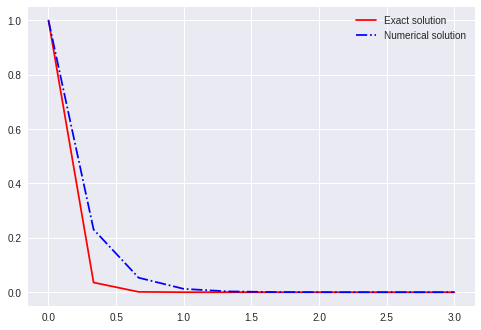

In [0]:
import numpy as np
import matplotlib.pyplot as plt

a, b, N  = 0, 3, 10;
u = [0]*N;
t = np.linspace(a, b, num=N)
k = t[1] - t[0];
theta = 1.0;

u[0] = 1;
for i in range(1,N):
  u[i] = (u[i-1]+k*(1-theta)*(-10*u[i-1]))/(1-k*theta*(-10))

max_error = max(abs(np.exp(-10*t)-u))  

print("max error:", max_error)

plt.plot(t,np.exp(-10*t),'r-',t,u,'b-.')
plt.gca().legend(('Exact solution','Numerical solution'))

# Non-linear ODE
We consider the non-linear ODE
$$\frac{du}{dt}=u(t)\bigl(1-u(t)\bigl)$$

Some comments:

*   Explicit scheme: $\frac{u_n-u_{n-1}}{k}=u_{n-1}(1-u_{n-1})$. Should work!
*   Implicit scheme: $\frac{u_n-u_{n-1}}{k}=u_{n}(1-u_{n}) \Longleftrightarrow u_n- ku_{n}(1-u_{n})=u_{n-1}$. Can be solved to find  $u_{n}$ for this case but the method does not work in general!

One needs to linearize the non-linear terms for the implicit schemes.
*   A single Picard iteration:  $\frac{u_n-u_{n-1}}{k}=u_{n}(1-u_{n-1}) \Longleftrightarrow u_n  = \frac{u_{n-1}}{ 1-k(1-u_{n-1})  } $.
*  Linearization by a geometric mean

$$\frac{u_n-u_{n-1}}{k}=u_{n+\frac{1}{2}}-u_{n+\frac{1}{2}}^2$$
where $u_{n+\frac{1}{2}}=\frac{u_n+u_{n-1}}{2}$ and $u_{n+\frac{1}{2}}^2=u_n\,u_{n-1}$



*  Newton's method



# References
Solving nonlinear ODE and PDE problems, Hans Petter Langtangen, https://hplgit.github.io/num-methods-for-PDEs/doc/pub/nonlin/pdf/nonlin-4print.pdf